In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ds = pd.read_csv("../data/boa/github_api.csv", parse_dates=['created_at', 'updated_at', 'pushed_at'])

In [3]:
ds["age"] = (ds["pushed_at"] - ds["created_at"]) / pd.to_timedelta('1 day')

In [4]:
ds["age"].describe()

count    1552.000000
mean      717.701516
std       541.046432
min         0.000845
25%       332.312966
50%       656.401609
75%       966.842459
max      3953.132014
Name: age, dtype: float64

In [5]:
nonds = pd.read_csv("../data/non-data-science/github_api.csv", parse_dates=['created_at', 'updated_at', 'pushed_at'])

In [6]:
nonds["age"] = (nonds["pushed_at"] - nonds["created_at"]) / pd.to_timedelta('1 day')

In [7]:
nonds["age"].describe()

count    9882.000000
mean     1717.596386
std       927.723405
min      -392.995961
25%      1028.442743
50%      1728.365295
75%      2379.651832
max      4360.879826
Name: age, dtype: float64

## Analyse Language

In [8]:
ds["language"].value_counts() / ds.shape[0]

Python              0.984536
Jupyter Notebook    0.007732
JavaScript          0.001289
HTML                0.001289
C++                 0.001289
Java                0.000644
Jsonnet             0.000644
Perl                0.000644
C#                  0.000644
TypeScript          0.000644
Name: language, dtype: float64

In [9]:
ds.shape

(1552, 16)

In [10]:
nonds["language"].value_counts() / nonds.shape[0]

Python                      0.944647
Jupyter Notebook            0.009613
JavaScript                  0.006881
HTML                        0.005869
Shell                       0.003542
Go                          0.003137
C                           0.002125
CSS                         0.001923
C++                         0.001720
Java                        0.000810
Rust                        0.000810
TeX                         0.000708
Vim script                  0.000607
Ruby                        0.000607
TypeScript                  0.000607
Roff                        0.000506
C#                          0.000506
PowerShell                  0.000506
YARA                        0.000405
PHP                         0.000405
Lua                         0.000304
Swift                       0.000304
Kotlin                      0.000304
TSQL                        0.000304
HCL                         0.000304
Dockerfile                  0.000304
SWIG                        0.000202
M

In [11]:
nonds.shape

(9882, 16)

## Select Recent

In [12]:
created_thresh = pd.to_datetime('2015-07-01T00:00Z')
#created_thresh = pd.to_datetime('2016-01-01T00:00Z')
created_thresh

Timestamp('2015-07-01 00:00:00+0000', tz='UTC')

In [13]:
nonds_sel = nonds[nonds["created_at"] >= created_thresh]
nonds_sel

,id,name,full_name,url,html_url,stars,created_at,updated_at,pushed_at,size,language,forks_count,open_issues_count,watch,description,age
2,103890505,mythril,ConsenSys/mythril,https://api.github.com/repos/ConsenSys/mythril,https://github.com/ConsenSys/mythril,1332,2017-09-18 04:14:20+00:00,2020-03-05 06:22:15+00:00,2020-03-11 18:27:50+00:00,53149,Python,293,80,57,Security analysis tool for EVM bytecode. Suppo...,905.592708
3,101479803,debops,debops/debops,https://api.github.com/repos/debops/debops,https://github.com/debops/debops,596,2017-08-26 10:46:25+00:00,2020-03-11 09:06:12+00:00,2020-03-10 14:43:18+00:00,27105,Shell,217,120,47,DebOps - Your Debian-based data center in a box,927.164502
4,49299616,ray,felipevolpone/ray,https://api.github.com/repos/felipevolpone/ray,https://github.com/felipevolpone/ray,216,2016-01-08 22:15:39+00:00,2020-02-27 07:28:51+00:00,2018-03-02 20:49:11+00:00,991,Python,9,4,21,a framework that helps you to deliver well-des...,783.939954
14,44940149,shadowsocks-rm,mengskysama/shadowsocks-rm,https://api.github.com/repos/mengskysama/shado...,https://github.com/mengskysama/shadowsocks-rm,424,2015-10-26 02:04:19+00:00,2020-03-02 08:52:51+00:00,2019-03-13 09:01:38+00:00,739,Python,502,45,43,A fast tunnel proxy that helps you bypass fire...,1234.289803
17,117024856,adversarial_image_defenses,facebookarchive/adversarial_image_defenses,https://api.github.com/repos/facebookarchive/a...,https://github.com/facebookarchive/adversarial...,412,2018-01-10 23:41:15+00:00,2020-03-02 02:14:28+00:00,2019-01-25 03:24:05+00:00,646,Python,58,0,15,Countering Adversarial Image using Input Trans...,379.154745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,90824610,pytorch-classification,bearpaw/pytorch-classification,https://api.github.com/repos/bearpaw/pytorch-c...,https://github.com/bearpaw/pytorch-classification,953,2017-05-10 05:33:36+00:00,2020-03-11 08:54:13+00:00,2019-12-12 21:55:36+00:00,438,Python,380,25,25,Classification with PyTorch.,946.681944
9874,40867333,pyltr,jma127/pyltr,https://api.github.com/repos/jma127/pyltr,https://github.com/jma127/pyltr,311,2015-08-17 05:42:11+00:00,2020-03-09 07:25:32+00:00,2017-11-05 05:34:33+00:00,67,Python,88,5,14,Python learning to rank (LTR) toolkit,810.994699
9879,39821165,Tomorrow,madisonmay/Tomorrow,https://api.github.com/repos/madisonmay/Tomorrow,https://github.com/madisonmay/Tomorrow,1442,2015-07-28 08:06:41+00:00,2020-03-10 02:42:02+00:00,2020-02-16 18:30:59+00:00,28,Python,102,5,49,Magic decorator syntax for asynchronous code i...,1664.433542
9880,241142684,pg_activity_fork,julmon/pg_activity_fork,https://api.github.com/repos/julmon/pg_activit...,https://github.com/julmon/pg_activity_fork,1,2020-02-17 15:33:13+00:00,2020-02-25 13:57:20+00:00,2020-02-15 07:01:25+00:00,1226,NaN,0,0,0,WARNING: Personal fork. pg_activity repository...,-2.355417


In [14]:
nonds_sel["age"].describe()

count    2511.000000
mean      913.130422
std       505.221950
min      -392.995961
25%       515.140880
50%       983.919155
75%      1339.640949
max      1714.908426
Name: age, dtype: float64

In [15]:
nonds = nonds_sel

## Rerun Analysis

In [16]:
def plot_all(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]
    start = max(0.9, min(np.min(xs1), np.min(xs2)))
    end = max(0.9, np.max(xs1), np.max(xs2))
    logbins = np.logspace(np.log10(start),np.log10(end),1000)
    
    plt.hist(xs1, bins=logbins, density=True, histtype='step', cumulative=True, label='ds')
    plt.hist(xs2, bins=logbins, density=True, histtype='step', cumulative=True, label='non-ds')
    plt.xscale('log')
    plt.title('distribution of ' + dim)
    plt.xlabel(dim)
    plt.ylabel('CDF')
    plt.savefig(dim + '-cdf-cutoff.png', dpi=300)
    plt.legend(loc='upper left')
    plt.show()
    
    return stats.ks_2samp(xs1, xs2)

In [17]:
dims = ['stars', 'size', 'forks_count', 'open_issues_count', 'watch', 'age']

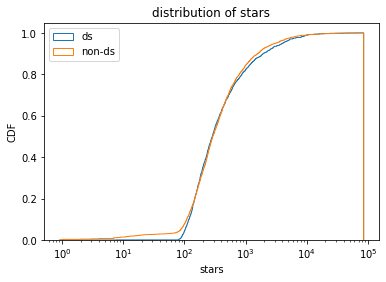

Ks_2sampResult(statistic=0.04630014533988595, pvalue=0.03145903424378704)


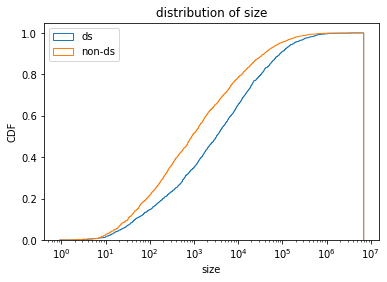

Ks_2sampResult(statistic=0.17078591311630886, pvalue=6.759831143865469e-05)


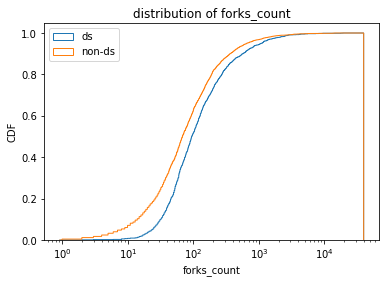

Ks_2sampResult(statistic=0.16968893569325894, pvalue=6.759831143865469e-05)


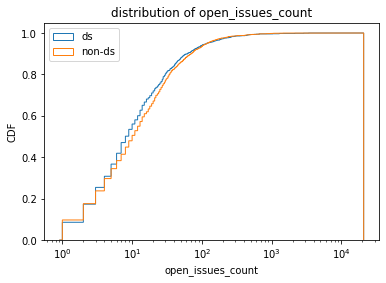

Ks_2sampResult(statistic=0.04262405210886532, pvalue=0.05909531236922916)


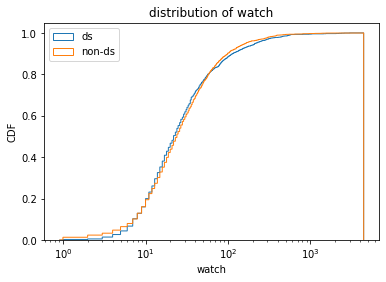

Ks_2sampResult(statistic=0.03351901119609799, pvalue=0.22492597064587405)


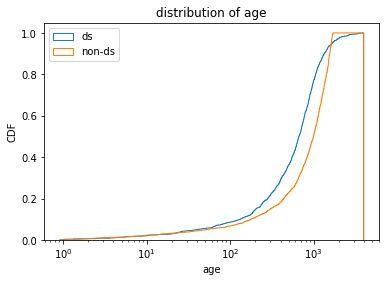

Ks_2sampResult(statistic=0.264128299400165, pvalue=6.759831143865469e-05)


In [18]:
for dim in dims:
    print(plot_all(dim))

In [19]:
def plot_all_date(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]


    start = min(np.min(xs1), np.min(xs2))
    end = max(np.max(xs1), np.max(xs2))
    
    plt.hist(xs1, bins=1000, range=(start, end), density=True, histtype='step', cumulative=True, label='ds')
    plt.hist(xs2, bins=1000, range=(start, end), density=True, histtype='step', cumulative=True, label='non-ds')
    plt.title('distribution of ' + dim)
    plt.xlabel(dim)
    plt.ylabel('CDF')
    plt.savefig(dim + '-cdf-cutoff.png', dpi=300)
    plt.legend(loc='upper left')
    plt.show()
    
    # convert timestamp to numerical values (so we can calc stats) 
    xs1 = xs1.map(lambda x: x.value)
    xs2 = xs2.map(lambda x: x.value)
    return stats.ks_2samp(xs1, xs2)

In [20]:
dims_date = ['created_at', 'updated_at', 'pushed_at']

/home/andrew/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/home/andrew/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, Futu

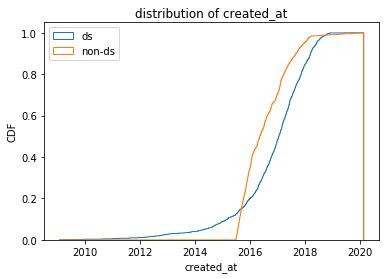

Ks_2sampResult(statistic=0.2501490862883724, pvalue=6.759831143865469e-05)


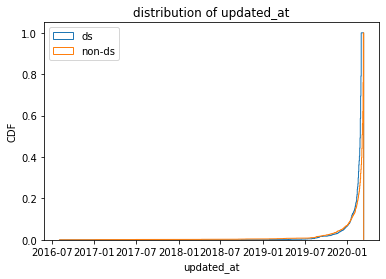

Ks_2sampResult(statistic=0.6415770609318996, pvalue=6.759831143865469e-05)


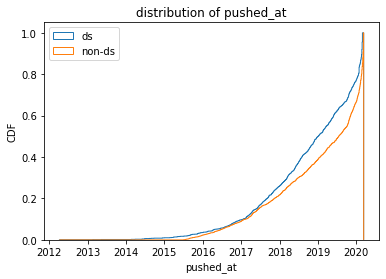

Ks_2sampResult(statistic=0.15491835921943448, pvalue=6.759831143865469e-05)


In [21]:
for dim in dims_date:
    print(plot_all_date(dim))

In [22]:
def plot_all_date_survival(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]
    start = min(np.min(xs1), np.min(xs2))
    end = max(np.max(xs1), np.max(xs2))
    
    plt.hist(xs1, bins=1000, range=(start, end), density=False, histtype='step', cumulative=-1, label='ds')
    plt.hist(xs2, bins=1000, range=(start, end), density=False, histtype='step', cumulative=-1, label='non-ds')
    plt.title('survival plot of ' + dim)
    plt.xlabel(dim)
    plt.ylabel('Survival')
    plt.legend(loc='upper right')
    plt.savefig(dim + '-survival-cutoff.png', dpi=300)
    plt.show()

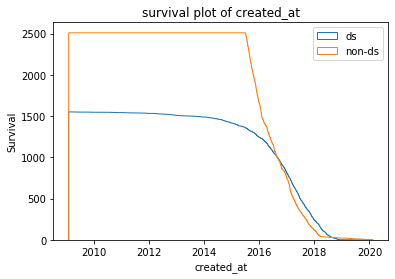

In [23]:
plot_all_date_survival('created_at')